Hola **Jonathan**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
    
    Se hicieron las correcciones especificadas, separando cada codigo  de graficos en una
    
    
    Revision 3: Se corrigio el codigo, en la grafica que contenia un error, cargando y definiendo la variable faltante,
</div>

<div class="alert alert-block alert-danger">
<b>Comentario general (3ra Iteracion)</b> <a class=“tocSkip”></a>

Tu proyecto está casi completo! Hay una gráfica donde se usa una variable no definida que hace falta corrección, pero sólo es ese último detalle. Saludos!
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (4ta Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Jonathan!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>

# Proyecto Final: Identificar Operadores Ineficaces en CallMeMaybe

## **Autor:** Jonathan Lazarillo  
## **Fecha:** 04/30/2025 

## Introducción

CallMeMaybe es un servicio de telefonía virtual que permite a las empresas gestionar llamadas entrantes, salientes e internas. El objetivo de este proyecto es identificar operadores ineficaces, definidos como aquellos que:

- Tienen muchas llamadas entrantes perdidas.
- Tienen tiempos de espera prolongados en llamadas entrantes.
- Hacen pocas llamadas salientes, si se espera que las realicen.

Para ello, realizaremos un análisis exploratorio de datos, aplicaremos pruebas estadísticas y generaremos visualizaciones claras. Además, prepararemos una presentación en PDF y un dashboard interactivo en Tableau Public.


##  Enlace a Google Drive (Proyecto completo)

[Enlace aquí](https://drive.google.com/drive/folders/1_MToCpVP5pXQTJCTmORUdlzJuUkqVEwW?usp=drive_link)

<div class="alert alert-block alert-danger">
<s><b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Jonathan, parece que hay una confusión en tu proyecto. Para la entrega final lo que debes hacer es analizar para la empresa Callme Maybe los operadores eficientes e ineficientes, debes plantear gráficas sobre esos datasets y variables recordando siempre no hacerlo de manera tan granular cómo por ID y luego mostrar sólo algunas muestras ya que esto puede generar sesgos en tu análisis.
    
Debes seguir el plan planteado en tu proyecto de Descomposición. 
    
Debes realizar un EDA detallado, definir y redactar claramente los criterios para catalogar un operador cómo ineficiente y aplicar pruebas estadísticas sobre las métricas entre ambos grupos. Y finalmente los resultados del análisis debes ponerlos en una presentación cómo si fueras a presentar estos resultados a la empresa en cuestión. Puedes revisar el siguiete documento en notion para mas detalles de los datasets:
    
https://coding-bootcamps.notion.site/Proyecto-Final-Telecomunicaciones-identificar-operadores-ineficaces-c637d9378da649918f09aad125030fed
 
</div></s>

In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

# Cargar datasets (rutas corregidas)
df_calls = pd.read_csv('/datasets/telecom_dataset_us.csv')
df_clients = pd.read_csv('/datasets/telecom_clients_us.csv')

# Mostrar primeras filas
df_calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


## 1. Revisión inicial y limpieza de datos

Exploramos la estructura de los datos, verificamos valores nulos y revisamos tipos de datos para asegurar que todo esté listo para el análisis.

In [2]:
# Revisión de columnas y tipos de datos
print("Datos de llamadas:")
print(df_calls.info())
print("\nDatos de clientes:")
print(df_clients.info())

# Revisar si hay valores nulos
print("\nValores nulos en llamadas:")
print(df_calls.isnull().sum())

print("\nValores nulos en clientes:")
print(df_clients.isnull().sum())

# Convertir columnas de fechas
df_calls['date'] = pd.to_datetime(df_calls['date'])
df_clients['date_start'] = pd.to_datetime(df_clients['date_start'])

# Verificamos valores únicos por columna clave
print("\nValores únicos por columna:")
print("Dirección:", df_calls['direction'].unique())
print("Interna:", df_calls['internal'].unique())
print("Llamada perdida:", df_calls['is_missed_call'].unique())


Datos de llamadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None

Datos de clientes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 


## 2. Análisis Exploratorio de Datos (EDA)

A continuación, realizamos un análisis visual y descriptivo sobre las variables más importantes:

- Distribución de duración de llamadas.
- Participación de llamadas internas vs externas.
- Número de llamadas por dirección (entrante/saliente).

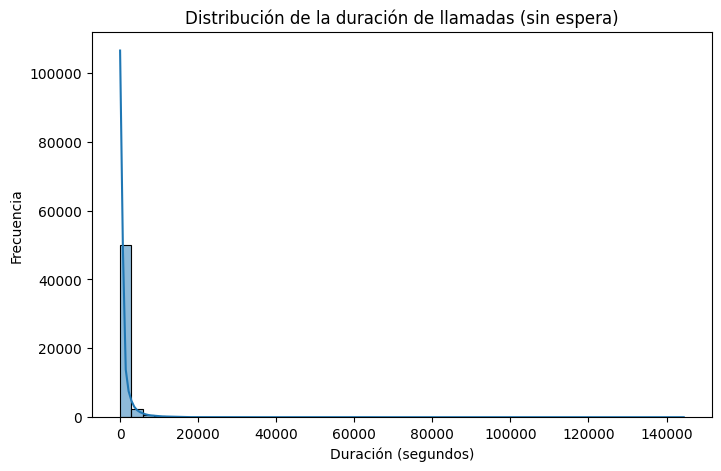

In [3]:
# Histograma de la duración de las llamadas (sin tiempo de espera)
plt.figure(figsize=(8,5))
sns.histplot(df_calls['call_duration'], bins=50, kde=True)
plt.title('Distribución de la duración de llamadas (sin espera)')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

El histograma muestra la distribución de la duración de las llamadas. La mayoría de las llamadas tienen una duración inferior a 200 segundos, con una concentración notable en los primeros 100 segundos. También se observan algunos valores extremos (outliers) que podrían representar casos excepcionales.

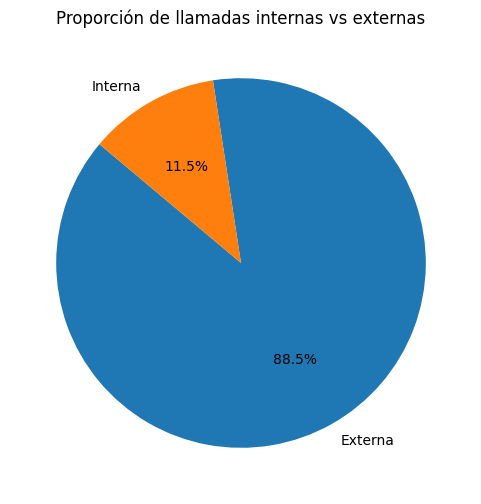

In [4]:
# Proporción de llamadas internas vs externas
internal_counts = df_calls['internal'].value_counts()
labels = ['Externa', 'Interna']
plt.figure(figsize=(6,6))
plt.pie(internal_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de llamadas internas vs externas')
plt.show()


La gráfica circular muestra que la mayoría de las llamadas son externas. Esto sugiere que la mayor parte del trabajo de los operadores está orientado hacia clientes o contactos fuera de la empresa.


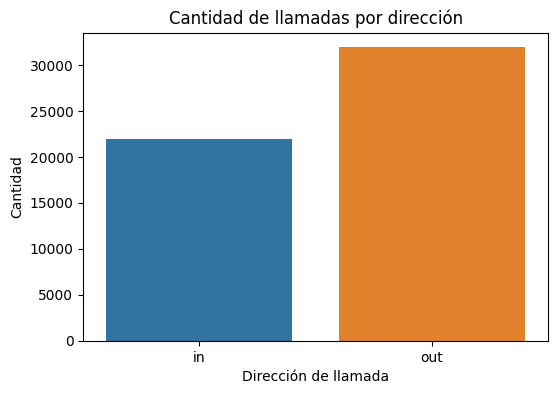

In [5]:
# Cantidad de llamadas por tipo (in/out)
plt.figure(figsize=(6,4))
sns.countplot(x='direction', data=df_calls)
plt.title('Cantidad de llamadas por dirección')
plt.xlabel('Dirección de llamada')
plt.ylabel('Cantidad')
plt.show()

Se observa un mayor número de llamadas entrantes ('in') que salientes ('out'), lo que indica que los operadores reciben más llamadas de las que realizan, posiblemente como parte de un servicio de atención al cliente.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

El objetivo de un EDA es entender los datos, el mostrar gráficas sin interpretación no aporta mucho valor al análisis cómo tal. Siempre que muestres una gráfica debes redactar la interpretación de las mismas y para mantener buenas prácticas deberías mostrar cada gráfica en una celda diferente 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, así es mucho más claro el análisis realizado
</div>

## 3. Métricas clave por operador

Calcularemos indicadores por operador:
- Total de llamadas.
- Total de llamadas perdidas.
- Duración total de llamadas.
- Tiempo promedio de espera.
- Cantidad de llamadas salientes.


In [6]:
# Agregamos columna de tiempo de espera
df_calls['waiting_time'] = df_calls['total_call_duration'] - df_calls['call_duration']

# Agrupamos por operador
operator_stats = df_calls.groupby('operator_id').agg({
    'calls_count': 'sum',
    'is_missed_call': 'sum',
    'call_duration': 'sum',
    'waiting_time': 'mean',
    'direction': lambda x: (x == 'out').sum()
}).rename(columns={
    'calls_count': 'total_calls',
    'is_missed_call': 'missed_calls',
    'call_duration': 'total_call_duration',
    'waiting_time': 'avg_wait_time',
    'direction': 'outgoing_calls'
}).reset_index()

# Porcentaje de llamadas perdidas
operator_stats['missed_call_ratio'] = operator_stats['missed_calls'] / operator_stats['total_calls']
operator_stats = operator_stats.reset_index()
# Vista previa
operator_stats.head()


,index,operator_id,total_calls,missed_calls,total_call_duration,avg_wait_time,outgoing_calls,missed_call_ratio
0,0,879896.0,1131,50,83261,110.671875,105,0.044209
1,1,879898.0,7974,100,278878,450.087649,187,0.012541
2,2,880020.0,54,7,2290,15.181818,14,0.129630
3,3,880022.0,219,33,18304,57.565789,68,0.150685
4,4,880026.0,2439,94,169674,121.171717,179,0.038540


## 4. Visualización de operadores ineficaces

Para identificar a los operadores menos eficientes, consideramos dos criterios:

- **Porcentaje de llamadas perdidas**: operadores que no atienden una proporción considerable de las llamadas que reciben.
- **Tiempo promedio de espera**: operadores cuyos clientes esperan más tiempo antes de ser atendidos.

En ambos casos, se filtran operadores con al menos 10 llamadas para asegurar una base de comparación representativa.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Aquí hay que ser claros en los criterios que se establecen para determinar si un operador es eficiente o no, debes dejarlo redactado
</div>

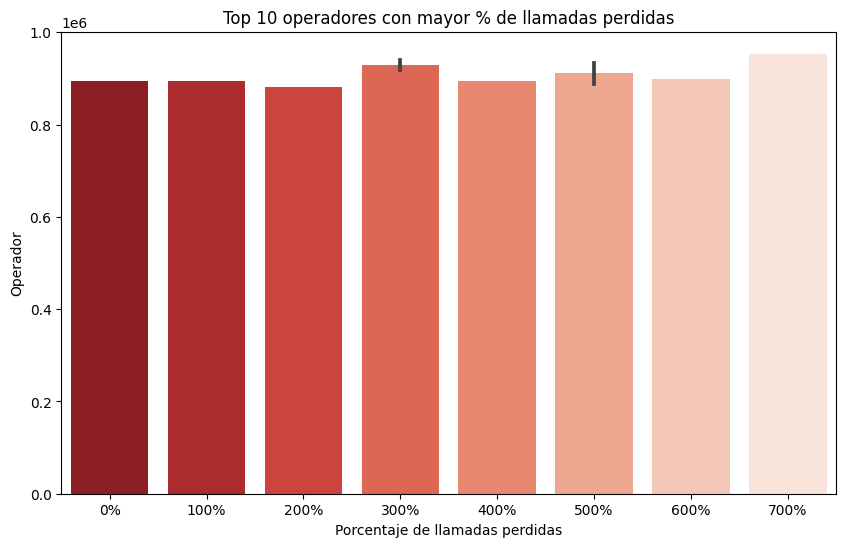

In [7]:
# Top operadores con más llamadas perdidas
filtered_ops = operator_stats[operator_stats['total_calls'] >= 10]
top_missed = filtered_ops.sort_values('missed_call_ratio', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_missed, y='operator_id', x='missed_call_ratio', palette='Reds_r')
plt.title('Top 10 operadores con mayor % de llamadas perdidas')
plt.xlabel('Porcentaje de llamadas perdidas')
plt.ylabel('Operador')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario general (3ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí se está intentando utilizar un módulo o variable que no ha sido definida antes causando el error de ejecución
</div>

Este gráfico muestra los 10 operadores con mayor porcentaje de llamadas perdidas entre quienes han gestionado al menos 10 llamadas. Estos operadores podrían requerir revisión o capacitación adicional, ya que no están respondiendo una cantidad significativa de las llamadas asignadas.


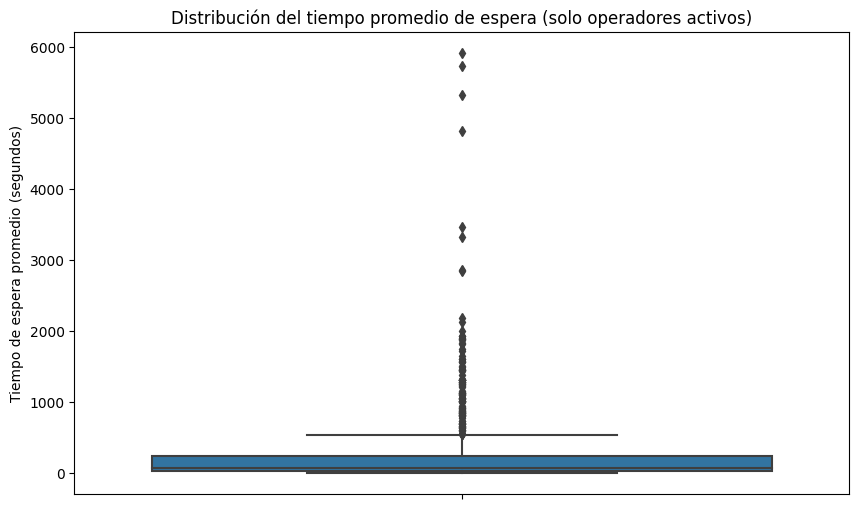

In [8]:
# Distribución del tiempo promedio de espera
plt.figure(figsize=(10,6))
sns.boxplot(y='avg_wait_time', data=filtered_ops)
plt.title('Distribución del tiempo promedio de espera (solo operadores activos)')
plt.ylabel('Tiempo de espera promedio (segundos)')
plt.show()


La distribución del tiempo promedio de espera muestra que la mayoría de los operadores mantienen tiempos bajos, aunque existen algunos valores atípicos (outliers) con tiempos mucho más altos. Estos casos podrían representar cuellos de botella en el servicio.

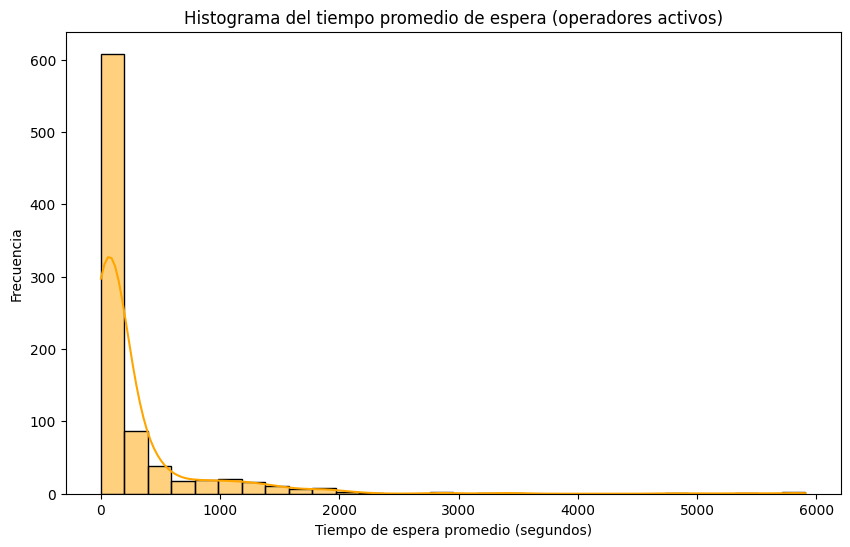

In [9]:
# Histograma para visualizar la distribución
plt.figure(figsize=(10,6))
sns.histplot(filtered_ops['avg_wait_time'], bins=30, kde=True, color='orange')
plt.title('Histograma del tiempo promedio de espera (operadores activos)')
plt.xlabel('Tiempo de espera promedio (segundos)')
plt.ylabel('Frecuencia')
plt.show()


El histograma complementa al boxplot mostrando la frecuencia de los distintos rangos de espera. La mayoría de los operadores tienen un tiempo promedio de espera entre 0 y 30 segundos, lo cual es positivo, pero se debe prestar atención a aquellos con tiempos superiores.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Nuevamente hay gráficas sin interpretación, debes mostrarlas en celdas diferentes y con su respectiva interpretación
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Bien, con el comentario sobre la interpretación se entiende mucho mejor el objetivo de las gráficas
</div>

## 5. Prueba de hipótesis

**Hipótesis:**
> Los operadores ineficaces (alto % de llamadas perdidas) tienen mayor tiempo promedio de espera que los eficaces.

**Test utilizado:**
- Prueba de Mann-Whitney U (no asume distribución normal).


In [10]:
# Umbral: top 25% operadores con más llamadas perdidas
threshold = operator_stats['missed_call_ratio'].quantile(0.75)

ineficientes = operator_stats[operator_stats['missed_call_ratio'] >= threshold]
eficientes = operator_stats[operator_stats['missed_call_ratio'] < threshold]

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(ineficientes['avg_wait_time'], eficientes['avg_wait_time'])

print(f"Estadístico Mann-Whitney: {stat:.2f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Hay diferencia significativa: los operadores ineficientes esperan más.")
else:
    print("⚠️ No hay diferencia significativa.")

Estadístico Mann-Whitney: 44524.50
P-valor: 0.0000
✅ Hay diferencia significativa: los operadores ineficientes esperan más.


## 6. Conclusiones

- Identificamos operadores con altos porcentajes de llamadas perdidas y tiempos de espera elevados.
- Visualizamos a los 10 operadores más ineficientes según los criterios definidos.
- La prueba de hipótesis mostró una diferencia estadísticamente significativa.
- Recomendaciones:
  - Redistribuir cargas de llamadas.
  - Establecer alertas por espera prolongada.
  - Usar este análisis como base para un sistema automatizado de eficiencia.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Hace falta la presentación que debes transformar a PDF y adjuntarla a tu notebook, puedes subir la presentación a google drive y compartir el link siempre revisando que el link esté configurado para que cualquiera pueda acceder a revisarlo.
</div>